https://www.gurobi.com/jupyter_models/

https://www.gurobi.com/resources/functional-code-examples/

https://www.gurobi.com/documentation/11.0/refman/constraints.html

https://www.gurobi.com/documentation/11.0/refman/optimization_status_codes.html#sec:StatusCodes")

In [24]:
%pip install gurobipy

In [ ]:
import gurobipy as gp
from gurobipy import *

n = 8         # Number of crossroads (nodes)
Edges = [(0, 1), (0, 5), (1, 2), (1, 3), (1, 5), (2, 4), (3, 4), (3, 6), (4, 7), (5, 6), (6, 7)]

try:
    m = Model("W3.0")    # General model
    m.Params.LogToConsole = 0









except GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))
except AttributeError:
    print('Encountered an attribute error')

In [ ]:
import gurobipy as gp
from gurobipy import *
import numpy as np

m = 6    # Number of clients
n = 4    # Number of locations
FixedCost =     [ 21, 16, 11, 24]
Cost = np.array([[ 6,  2,  3,  4],
                 [ 1,  9,  4, 11],
                 [15,  2, 16,  3],
                 [ 9, 11,  4,  8],
                 [ 7, 23,  2,  9],
                 [ 4,  3, 11,  5]])
try:
    UFL = Model("W3.1")
    UFL.Params.LogToConsole = 0








except GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))
except AttributeError:
    print('Encountered an attribute error')

In [ ]:
import gurobipy as gp
from gurobipy import *

n = 10         # Number of teams

try:
    m = Model("W3.2 ")
    m.Params.LogToConsole = 0






except GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))
except AttributeError:
    print('Encountered an attribute error')

In [ ]:
import gurobipy as gp
from gurobipy import *
import random

n = 20                                          # Number of gold pieces
v = [random.randint(10, 50) for _ in range(n)]

try:
    m = Model("W3.3")
    m.Params.LogToConsole = 0






except GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))
except AttributeError:
    print('Encountered an attribute error')

# Assignment 3
#### **Author**: *Anton Pham* 13179543, *Bowen Ma* 12960780, *Weichen Fang* 13218115
 Question W3.0 and W3.3 are the designated questions based on our student numbers.


# W3.0 - Model Formulation
### $\mathrm{I.}$ Decision Variables
\begin{aligned}
x_i = \begin{cases}&1, &\text{ if a phone is placed at crossroad i with i = 1, …, 8}\\
&0, &\text{ otherwise}
\end{cases}
\end{aligned}
### $\mathrm{II.}$ Objective Function
\begin{aligned}
\min\quad z=\sum_{i=1}^8x_i\\
\end{aligned}
### $\mathrm{III.}$  Constraints
\begin{aligned}
\begin{cases}
x_1+x_2\geq1\\
x_2+x_3\geq1\\
x_4+x_5\geq1\\
x_7+x_8\geq1\\
x_6+x_7\geq1\\
x_2+x_6\geq1\\
x_1+x_6\geq1\\
x_4+x_7\geq1\\
x_2+x_4\geq1\\
x_5+x_8\geq1\\
x_2+x_5\geq1\\
x_i\in\{0,1\}, i=1,\dots,8
\end{cases}
\end{aligned}



In [ ]:
import gurobipy as gp
from gurobipy import *

n = 8         # Number of crossroads (nodes)
Edges = [(0, 1), (0, 5), (1, 2), (1, 3), (1, 5), (2, 4), (3, 4), (3, 6), (4, 7), (5, 6), (6, 7)]

try:
    #create model
    model = Model("telephones")    # General model
    m.Params.LogToConsole = 0

    # Create variables (Dictionary of variables)
    x = {i: model.addVar(vtype=GRB.BINARY, name=f"x{i+1}") for i in range(n)}

    # Set objective
    model.setObjective(quicksum(x[i] for i in range(8)), GRB.MINIMIZE)

    #create constraints:
    for e in Edges:
        model.addConstr(x[e[0]] + x[e[1]] >= 1)


    # Optimize model
    model.optimize()

    # Check outcome of the model
    print(f'Model: {model.NumVars} variables, {model.NumConstrs} constraints and {model.NumNZs} nonzeros')
    print(f"Optimal Objective Value: {model.ObjVal}\n")
    x_optimized = {v.varName: v.x for v in model.getVars()}
    print(x_optimized)

    # Print for all variables the most relevant attributes
    print("\nVarName      |  x_j  |  lb  |  ub  |  obj  |  vtype")
    for v in model.getVars():
        print(f"{v.VarName:12} | {v.X:5.1f} | {v.lb:4.1f} | {v.ub:4.1f} | {v.obj:5.1f} | {v.vtype:4} ")

    # Print for all constraints the most relevant attributes
    print("\nConstrName   |  RHS  | Sense")
    for c in model.getConstrs():
        print(f"{c.ConstrName:12} | {c.rhs:5.1f} | {c.Sense}=")

except GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))
except AttributeError:
    print('Encountered an attribute error')


## Conclusion:
The government should consider deploying a minimum of four telephones strategically placed at crossroads 2, 5, 6, and 7.

# W3.1 - Model Formulation
### $\mathrm{I.}$ Decision Variables
\begin{aligned}
&f_j: \text{the cost of open a depot at location } j, \text{ for } j\in\{1,2,3,4\}.\\  
&c_{ij}: \text{the cost of deliver one unit of good to client } i \text{ from depot }j, \text{ for }j\in\{1,2,3,4\} \text{ and } i\in\{1,2,3,4,5,6\}.  \\
&x_j=\begin{cases}1,\text{ when depot j is open, }j\in\{1,2,3,4\} \\0,\text{ otherwise}\end{cases}\\
&y_{i,j}=\begin{cases}1,\text{ when customer i receive 1 unit good from depot j,}\text{ for }i\in\{1,2,3,4,5,6\} \text{ and }j\in\{1,2,3,4\}\\0\text{ otherwise}\end{cases}
\end{aligned}
### $\mathrm{II.}$ Objective Function
\begin{aligned}
\min\quad\sum_{j=1}^4 f_j\cdot x_j+\sum_{i=1}^6 \sum_{j=1}^4 c_{ij}\cdot y_{i,j}
\end{aligned}
### $\mathrm{III.}$  Constraints
\begin{aligned}
\begin{cases}
\sum_{j=1}^4 y_{1,j}=1\\
\sum_{j=1}^4 y_{2,j}=1\\
\sum_{j=1}^4 y_{3,j}=1\\
\sum_{j=1}^4 y_{4,j}=1\\
\sum_{j=1}^4 y_{5,j}=1\\
\sum_{j=1}^4 y_{6,j}=1\\
x_i,y_{i,j}\in\{0,1\}
\end{cases}
\end{aligned}

# W3.2 - Model Formulation
### $\mathrm{I.}$ Decision Variables
\begin{aligned}
x_i=\begin{cases}1,\text{ when match i is held, } i\in\{1,\dots,
10\}\\0,\text{ otherwise}\end{cases}\\
\end{aligned}  
### $\mathrm{II.}$ Objective Function
\begin{aligned}
\max\quad\sum_{i=1}^{10} x_i
\end{aligned}
### $\mathrm{III.}$  Constraints
\begin{aligned}
\begin{cases}
x_1+x_7&\leq1\\
x_4+x_5&\geq1\\
x_2+x_5+x_8&\leq2\\
3x_8+x_1+x_7+x_9+x_{10}&\leq4\\
2x_7+x_6+x_4&\leq2\\
x_i\in\{0,1\},\quad i \in\{1,…,10\}
\end{cases}
\end{aligned}



# W3.3 - Model Formulation
### $\mathrm{I.}$ Decision Variables
\begin{aligned}&x_i=\begin{cases}1,\text{ the gold piece i the first person receive, } i\in\{1,\dots,
20\}\\0,\text{ otherwise}\end{cases}\\
&y_i=\begin{cases}1,\text{ the gold piece i the first person receive, } i\in\{1,\dots,
20\}\\0,\text{ otherwise}\end{cases}
\end{aligned}  
### $\mathrm{II.}$ Objective Function
\begin{aligned}\min\quad\sum_{i=1}^{20}\left|v_i\cdot x_i-v_i\cdot y_i\right|\end{aligned}
### $\mathrm{III.}$  Constraints
\begin{aligned}
\begin{cases}
&x_i+y_i=1,\quad &i\in\{1,\dots,
20\}\\
&x_i,y_i\in\{0,1\},\quad &i\in\{1,\dots,
20\}
\end{cases}
\end{aligned}



In [ ]:
import gurobipy as gp
from gurobipy import *
import random

n = 20                                          # Number of gold pieces
v = [random.randint(10, 50) for _ in range(n)]
values=v
try:
    m = Model("W3.3")
    m.Params.LogToConsole = 0


    model = Model("Gold")
    model.Params.LogToConsole = 0

    # Generate random values for the gold pieces
    #random.seed(42)
    #values = [random.randint(1, 50) for _ in range(20)]
    x = {}
    y = {}

    for i in range(20):
        x[i] = model.addVar(0, 1, vtype=GRB.BINARY, name="x{0}".format(i))
        y[i] = model.addVar(0, 1, vtype=GRB.BINARY, name="y{0}".format(i))
    # Create auxiliary variable 'diff'
    diff = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="AbsDiff")

    # Set the objective function
    model.setObjective(diff, GRB.MINIMIZE)

    # Add constraint: Only one person can get the i'th gold piece
    for i in range(20):
        model.addConstr(x[i] + y[i] == 1, name="constraint_{0}".format(i))

    # Add: constraint: Make sure that the differences are all positive
    model.addConstr(diff >= quicksum(values[i] * x[i] - values[i] * y[i] for i in range(20)), "Diff1")
    model.addConstr(diff >= quicksum(-values[i] * x[i] + values[i] * y[i] for i in range(20)), "Diff2")

    model.optimize()
    p1 = sum(values[i] * x[i] for i in range(20))
    p2 = sum(values[i] * y[i] for i in range (20))
    print("The optimal objective is {0:g} euro".format(model.ObjVal))

    for i in range(20):
        print(f"Piece {i + 1}: Person 1 receives {x[i].x} and Person 2 receives {y[i].x}")
    person1_pieces = [i+1 for i in range(20) if x[i].x==1]
    person2_pieces = [i+1 for i in range(20) if y[i].x==1]
    print(f"Person 1 get gold pieces: {person1_pieces}")
    print(f"Person 2 get gold pieces: {person2_pieces}")
    person1_value = sum(values[i] * x[i].x for i in range(n))
    person2_value = sum(values[i] * y[i].x for i in range(n))
    print(f"Total Value for Person 1: {person1_value}")
    print(f"Total Value for Person 2: {person2_value}")
    print(values)




except GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))
except AttributeError:
    print('Encountered an attribute error')


The optimal objective is 0 euro
Piece 1: Person 1 receives -0.0 and Person 2 receives 1.0
Piece 2: Person 1 receives -0.0 and Person 2 receives 1.0
Piece 3: Person 1 receives -0.0 and Person 2 receives 1.0
Piece 4: Person 1 receives 1.0 and Person 2 receives 0.0
Piece 5: Person 1 receives -0.0 and Person 2 receives 1.0
Piece 6: Person 1 receives 1.0 and Person 2 receives 0.0
Piece 7: Person 1 receives 1.0 and Person 2 receives 0.0
Piece 8: Person 1 receives 1.0 and Person 2 receives 0.0
Piece 9: Person 1 receives 0.0 and Person 2 receives 1.0
Piece 10: Person 1 receives 1.0 and Person 2 receives 0.0
Piece 11: Person 1 receives 1.0 and Person 2 receives 0.0
Piece 12: Person 1 receives 1.0 and Person 2 receives 0.0
Piece 13: Person 1 receives 1.0 and Person 2 receives 0.0
Piece 14: Person 1 receives -0.0 and Person 2 receives 1.0
Piece 15: Person 1 receives 1.0 and Person 2 receives 0.0
Piece 16: Person 1 receives 1.0 and Person 2 receives 0.0
Piece 17: Person 1 receives -0.0 and Person 

## Conclusion:
In order to achieve a more equitable distribution of total values among individuals, it is recommended that person 1 receives gold pieces numbered 4, 6, 7, 8, 10, 11, 12, 13, 15, 16, 19, while person 2 is allocated the remaining gold pieces. This allocation results in a minimized difference of 0 in total values received by each person.

It is important to note that the absence of the random.seed() function introduces variability in the results, making them subject to change with each execution.

# W3.4 - Minimum Cost Problem

### $\mathrm{I.}$ Decision Variables
Let $x_{i,j}$ be the flow on arc $(i, j)$, where $i$ and
 $j$ represent nodes in the network.

### $\mathrm{II.}$ Objective Function
**Notations**:  
$𝜜$: arc set    
$c_{(i,j)}$: cost per unit of flow
Minimize the total cost of flow in the network:
\begin{equation}
    \text{min} \quad \sum_{i, j \, \in \, 𝜜} c_{(i,j)} \cdot x_{(i,j)}
\end{equation}

### $\mathrm{III.}$  Constraints
1. **Flow Conservation Constraints:**
\begin{equation}
    \sum_{j} x_{i,j} = \sum_{j} x_{j,i} \quad \forall i \, \in \, \text{intermediate nodes}
\end{equation}
Flow into a node equals flow out of the node for all intermediate nodes.

2. **Flow into Source Constraint:**
\begin{equation}
    \sum_{j} x_{\text{source},j} = v_0
\end{equation}
The total flow into the source node equals the specified value $v_0$.

3. **Flow out of Terminal Constraint:**
\begin{equation}
    \sum_{i} x_{i,\text{terminal}} = v_0
\end{equation}
Total flow out of the terminal node equals the specified value $v_0$.

4. **Capacity Bounds Constraints:**
\begin{equation}
    x_{i,j} \leq \text{capacity}_{i,j} \quad \forall (i, j) \, \in \, 𝜜
\end{equation}

 The flow on each arc does not exceed its capacity.


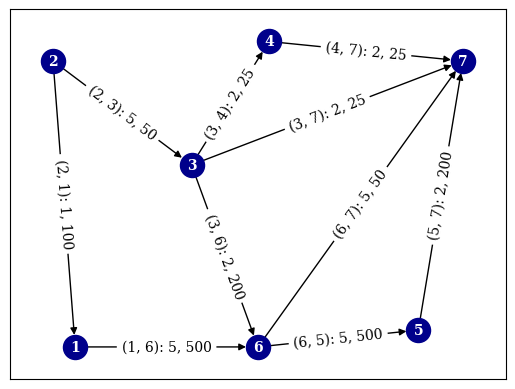

Minimum Cost Flow Problem (status=2)
Optimal solution found
# 10 variables, 17 constraints and 30 nonzeros
Optimal objective: 950.0 units
Optimal solution: 
- Flow from 2 to 1: 50.0
- Flow from 2 to 3: 50.0
- Flow from 3 to 4: 25.0
- Flow from 4 to 7: 25.0
- Flow from 3 to 6: 0.0
- Flow from 1 to 6: 50.0
- Flow from 3 to 7: 25.0
- Flow from 6 to 5: 0.0
- Flow from 6 to 7: 50.0
- Flow from 5 to 7: 0.0

Variables' attributes: 
VarName                  |     x_j      low   &   up |     c_j      low   &   up   type
x[2,1]                   |   50.00     0.00      inf |    1.00    -3.00      inf      C   
x[2,3]                   |   50.00     0.00      inf |    5.00     -inf     9.00      C   
x[3,4]                   |   25.00     0.00      inf |    2.00     0.00     6.00      C   
x[4,7]                   |   25.00     0.00      inf |    2.00     0.00     6.00      C   
x[3,6]                   |    0.00     0.00      inf |    2.00    -3.00      inf      C   
x[1,6]                   |  

In [75]:
import gurobipy as gp
from gurobipy import *
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np


def plot_network(vertices, source, terminal, arcs, cost, info):
    # Plot the network
    G = nx.DiGraph()
    G.add_nodes_from(vertices)
    G.add_weighted_edges_from([(i,j,cost[i,j]) for i,j in cost])

    labels = {(i, j):'({}, {}): {}, {}'.format(i, j, cost[i, j], info[i, j]) for i,j in arcs}

    # Show node labels
    pos = nx.planar_layout(G)
    pos[source], pos[terminal] = np.array([-1, 0]),np.array([1, 0])
    pos[4] -= np.array([0, .25])
    pos[5] -= np.array([-.35, .55])
    pos[6] -= np.array([1, 0])
    nx.draw_networkx_nodes(G, pos, node_color='darkblue')
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10, font_family='serif')
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='serif', font_color='w', font_weight='bold')
    plt.show()

    return


def print_solution(m):
    # Print outcome of the optimization
    print('Optimal solution found')
    print(f"# {m.NumVars} variables, {m.NumConstrs} constraints and {m.NumNZs} nonzeros")
    print(f"Optimal objective: {m.ObjVal} units")
    print(f"Optimal solution: ", *(f'- Flow from {i} to {j}: {x[i,j].X}' for i, j in arcs), sep='\n')

    # Print for all variables the most relevant attributes
    print("\nVariables' attributes: ")
    print("VarName                  |     x_j      low   &   up |     c_j      low   &   up   type")
    for v in m.getVars():
        print(f"{v.VarName:24} |{v.X:8.2f} {v.lb:8.2f} {v.ub:8.2f} |{v.obj:8.2f} {v.saobjlow:8.2f} {v.saobjup:8.2f}      {v.vtype:3} ")

    # Print for all constraints the most relevant attributes
    print("\nConstraints' attributes: ")
    print("ConstrName               |     RHS     Slack         Pi")
    for c in m.getConstrs():
        print(f"{c.ConstrName:24} |{c.rhs:8.2f}  {c.Slack:8.2f}   {c.pi:8.2f}")

    return


# nodes or vertices
vertices = [ i for i in range(1, 8)]
source   = 2
terminal = 7
interm = [ i for i in vertices if i!=source and i!=terminal]

# arcs = directed edges, each arc has a fixed capacity and cost
arcs, capacity = gp.multidict({
    (2,1) : 100, (2,3) : 50, (3,4) :  25, (4,7) : 25, (3,6) : 200,
    (1,6) : 500, (3,7) : 25, (6,5) : 500, (6,7) : 50, (5,7) : 200 })

cost = {
    (2,1) : 1, (2,3) : 5, (3,4) : 2, (4,7) : 2, (3,6) : 2,
    (1,6) : 5, (3,7) : 2, (6,5) : 5, (6,7) : 5, (5,7) : 2 }

v0 = 100                  # flow to be send through the network

# Plot the network
plot_network(vertices, source, terminal, arcs, cost, capacity)

# Solve the minimum cost flow problem
try:
    # Create model
    m = Model("Minimum Cost Flow Problem")  # Model 8.2.4, page 351
    m.Params.LogToConsole = 0

    # Create variables
    x = m.addVars(arcs, name="x")  #  flow on each arc

    # Set objective
    m.setObjective(quicksum(cost[i,j]*x[i,j] for i, j in arcs), GRB.MINIMIZE)

    # Add constraints
    m.addConstrs((x.sum(i,'*') == x.sum('*', i) for i in interm), "Flow conservation")
    m.addConstr(x.sum(source,'*') == v0, "Flow into source")
    m.addConstr(x.sum('*', terminal) == v0, "Flow out of terminal")
    m.addConstrs((x[i,j] <= capacity[i,j] for i, j in arcs), "Capacity bounds")

    # Optimize model
    m.optimize()

    # Print solution
    print(f"{m.ModelName} (status={m.Status})")
    if m.status == GRB.OPTIMAL:
        print_solution(m)

    else:
        print('No solution')

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')



## Concusion:
The minimum cost is 950.


# W3.5a Maximum Flow Problem

### $\mathrm{I.}$ Decision Variables
Let $ x_{i,j} $ be the flow on arc $i, j$, where $i$ and $j$ represent nodes in the network.

### $\mathrm{II.}$ Objective Function
Maximize the total flow out of the source node into the terminal node:
\begin{equation} \text{max} \quad \sum_{j} x_{\text{source},j} \end{equation}

### $\mathrm{III.}$  Constraints
1. **Flow Conservation Constraints:**
\begin{equation}
    \sum_{j} x_{i,j} = \sum_{j} x_{j,i} \quad \forall i \, \in \, \text{intermediate nodes}
\end{equation}
Flow into a node equals flow out of the node for all intermediate nodes.

2. **Flow into Source Constraint:**
\begin{equation}
   \sum_{j} x_{\text{source},j} = \sum_{j} x_{j,\text{terminal}}
\end{equation}
Total flow into the source node equals the total flow out of the terminal node.

3. **Capacity Bounds Constraints:**
\begin{equation}
   x_{i,j} \leq \text{info}_{i,j} \quad \forall (i, j) \, \in \, \text{arcs}
\end{equation}
The flow on each arc does not exceed its capacity.



In [76]:
import gurobipy as gp
from gurobipy import *

# nodes or vertices
vertices = [ i for i in range(1, 8)]
source   = 2
terminal = 7
interm = [ i for i in vertices if i!=source and i!=terminal]

# arcs = directed edges, each arc has a fixed capacity
arcs, info = gp.multidict({
    (2,1) : 100, (2,3) : 50, (3,4) :  25, (4,7) : 25, (3,6) : 200,
    (1,6) : 500, (3,7) : 25, (6,5) : 500, (6,7) : 50, (5,7) : 200 })

# Solve the maximum flow problem
try:
    # Create model
    m = Model("Maximum Flow Problem")  #  Model 8.2.5, page 354
    m.Params.LogToConsole = 0

    # Create variables
    x = m.addVars(arcs, name="x")  #  flow on each arc

    # Set objective
    m.setObjective(x.sum('*', terminal), GRB.MAXIMIZE)

    # Add constraints
    m.addConstrs((x.sum(i,'*') == x.sum('*', i) for i in interm), "Flow conservation")
    m.addConstr(x.sum(source,'*') == x.sum('*', terminal), "Flow into source")
    m.addConstrs((x[i,j] <= info[i,j] for i, j in arcs), "Capacity bounds")

    # Optimize model
    m.optimize()

    # Print solution
    print(f"{m.ModelName} (status={m.Status})")
    if m.status == GRB.OPTIMAL:
        print_solution(m)

    else:
        print('No solution')

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))
except AttributeError:
    print('Encountered an attribute error')

Maximum Flow Problem (status=2)
Optimal solution found
# 10 variables, 16 constraints and 30 nonzeros
Optimal objective: 150.0 units
Optimal solution: 
- Flow from 2 to 1: 100.0
- Flow from 2 to 3: 50.0
- Flow from 3 to 4: 0.0
- Flow from 4 to 7: 0.0
- Flow from 3 to 6: 50.0
- Flow from 1 to 6: 100.0
- Flow from 3 to 7: 0.0
- Flow from 6 to 5: 150.0
- Flow from 6 to 7: 0.0
- Flow from 5 to 7: 150.0

Variables' attributes: 
VarName                  |     x_j      low   &   up |     c_j      low   &   up   type
x[2,1]                   |  100.00     0.00      inf |    0.00    -1.00      inf      C   
x[2,3]                   |   50.00     0.00      inf |    0.00    -1.00      inf      C   
x[3,4]                   |    0.00     0.00      inf |    0.00     -inf     0.00      C   
x[4,7]                   |    0.00     0.00      inf |    1.00     -inf     1.00      C   
x[3,6]                   |   50.00     0.00      inf |    0.00    -0.00      inf      C   
x[1,6]                   |  10

## Conclusion:
The maximal amount
that can be transported through the network from a source node to a terminal node is 150 units.

# W3.5b Minimum Cut Problem





In [77]:
import gurobipy as gp
from gurobipy import *

# nodes
vertices = [ i for i in range(1, 8)]
source   = 2
terminal = 7

# arcs = directed edges, each arc has a fixed capacity
arcs, info = gp.multidict({
    (2,1) : 100, (2,3) : 50, (3,4) :  25, (4,7) : 25, (3,6) : 200,
    (1,6) : 500, (3,7) : 25, (6,5) : 500, (6,7) : 50, (5,7) : 200 })

# Solve the minimum cut problem
try:
    # Create model
    m = Model("Minimum Cut Problem")  #  Model 8.2.6, page 358

    # Create variables. It is the dual of the maximum flow problem
    y = m.addVars(vertices, name="y")  #  dual variable for each node
    w = m.addVars(arcs, name="w")      #  dual variable for each arc

    # Set objective
    m.setObjective(quicksum(w[i,j]*info[i,j] for i, j in arcs), GRB.MINIMIZE)

    # Add constraints
    m.addConstr(y[terminal] - y[source] >= 1, "Source to terminal")
    m.addConstrs((y[i] - y[j] >= -w[i,j] for i, j in arcs), "Arc constraints")

    # Optimize model
    m.optimize()

    # Print solution
    print(f"{m.ModelName} (status={m.Status})")
    if m.status == GRB.OPTIMAL:
        print_solution(m)

    else:
        print('No solution')


except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))
except AttributeError:
    print('Encountered an attribute error')

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 11 rows, 17 columns and 32 nonzeros
Model fingerprint: 0xf638d3fe
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 5e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 11 rows and 17 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.500000000e+02
Minimum Cut Problem (status=2)
Optimal solution found
# 17 variables, 11 constraints and 32 nonzeros
Optimal objective: 150.0 units
Optimal solution: 
- Flow from 2 to 1: 100.0
- Flow from 2 to 3: 50.0
- Flow fro

## Conclusion:
In the minimal cut problem we indeed found the same optimal objective as in the maximum flow problem.

# W3.6a - Shortest Path Problem

### $\mathrm{I.}$ Decision Variables
Let $ x_{i,j} $ be the flow on arc $(i, j)$ and $ t_i $ be the time at each node $i$.

### $\mathrm{II.}$ Objective Function
Minimize the total cost of flow in the network:  
**Notation:**
$c_{(i,j)}$: cost per unit of flow
\begin{equation}
    \text{min} \quad \sum_{i, j \, \in \, \text{arcs}} c_{i,j} \cdot x_{i,j}
\end{equation}
    
### $\mathrm{III.}$ Constraints
1. **Flow Conservation Constraints:**
\begin{equation}
    \sum_{j} x_{i,j} = \sum_{j} x_{j,i} \quad \forall i \, \in \, \text{intermediate nodes}
\end{equation}
Flow into a node equals flow out of the node for all intermediate nodes.

2. **Flow into Source Constraint:**
\begin{equation}
    \sum_{j} x_{\text{source},j} = v_0
\end{equation}
Total flow into the source node equals the specified value $v_0$.

3. **Flow out of Terminal Constraint:**
\begin{equation}
    \sum_{i} x_{i,\text{terminal}} = v_0
\end{equation}
Total flow out of the terminal node equals the specified value $v_0$.



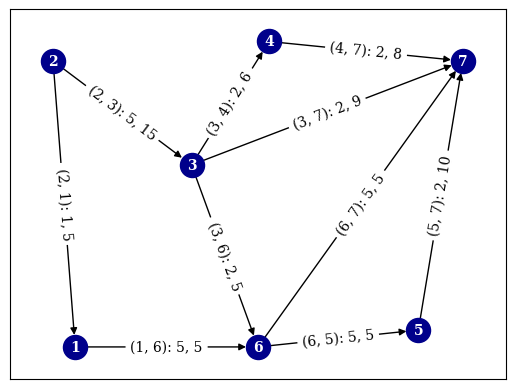

Minimum Cost Flow Problem with Time (status=2)
Optimal solution found
# 17 variables, 7 constraints and 20 nonzeros
Optimal objective: 7.0 units
Optimal solution: 
- Flow from 2 to 1: 0.0
- Flow from 2 to 3: 1.0
- Flow from 3 to 4: 0.0
- Flow from 4 to 7: 0.0
- Flow from 3 to 6: 0.0
- Flow from 1 to 6: 0.0
- Flow from 3 to 7: 1.0
- Flow from 6 to 5: 0.0
- Flow from 6 to 7: 0.0
- Flow from 5 to 7: 0.0

Variables' attributes: 
VarName                  |     x_j      low   &   up |     c_j      low   &   up   type
x[2,1]                   |    0.00     0.00      inf |    1.00    -3.00     2.00      C   
x[2,3]                   |    1.00     0.00      inf |    5.00     4.00     9.00      C   
x[3,4]                   |    0.00     0.00      inf |    2.00     0.00      inf      C   
x[4,7]                   |    0.00     0.00      inf |    2.00     0.00      inf      C   
x[3,6]                   |    0.00     0.00      inf |    2.00     1.00      inf      C   
x[1,6]                   |  

In [78]:
import gurobipy as gp
from gurobipy import *

# nodes or vertices
vertices = [ i for i in range(1, 8)]
source   = 2
terminal = 7
interm = [ i for i in vertices if i!=source and i!=terminal]

# arcs = directed edges, each arc has a fixed cost and duration
arcs, cost = gp.multidict({
    (2,1) : 1, (2,3) : 5, (3,4) : 2, (4,7) : 2, (3,6) : 2,
    (1,6) : 5, (3,7) : 2, (6,5) : 5, (6,7) : 5, (5,7) : 2 })


time = {
    (2,1) : 5, (2,3) : 15, (3,4) : 6, (4,7) : 8, (3,6) : 5,
    (1,6) : 5, (3,7) : 9,  (6,5) : 5, (6,7) : 5, (5,7) : 10 }

v0 = 1                  # one unit flow to be send through the network
t0 = 15                 # maximum allowed time to travel from source to sink

# Plot the network
plot_network(vertices, source, terminal, arcs, cost, time)

# Solve the constrained shortest path problem
try:
    # Create model
    m = Model("Minimum Cost Flow Problem with Time")
    m.Params.LogToConsole = 0

    # Create variables
    x = m.addVars(arcs, name="x")  #  flow on each arc
    t = m.addVars(vertices, name="t")  #  time at each node

    # Set objective
    m.setObjective(quicksum(cost[i,j]*x[i,j] for i, j in arcs), GRB.MINIMIZE)

    # Add constraints
    m.addConstrs((x.sum(i,'*') == x.sum('*', i) for i in interm), "Flow conservation")
    m.addConstr(x.sum(source,'*') == v0, "Flow into source")
    m.addConstr(x.sum('*', terminal) == v0, "Flow out of terminal")

    # Optimize model
    m.optimize()

    # Print solution
    print(f"{m.ModelName} (status={m.Status})")
    if m.status == GRB.OPTIMAL:
        print_solution(m)

    else:
        print('No solution')

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')


## Conclusion:
The cost of the shortest path is 7. The path is 2 → 3 → 7

# W3.6b - Constrained Shortest Path Problem

### $\mathrm{I.}$ Additional Decision Variables
Let $ t_i $ be the time at each node $i$.

### $\mathrm{II.}$ Additional Constraints
1. **Maximum Time Constraints:**
\begin{equation}
    \sum t_i \leq t_0 = 15 \quad \forall (i, j) \, \in \, \text{arcs}
\end{equation}
The total time is below the maximum allowed time.



In [79]:
# Solve the constrained shortest path problem
try:
    # Create model
    m = Model("Constrained Shortest Path Problem")
    m.Params.LogToConsole = 0

    # Create variables
    x = m.addVars(arcs, name="x",vtype=GRB.BINARY)  #  flow on each arc
    t = m.addVars(time, name="t")  #  time at each node

    # Set objective
    m.setObjective(quicksum(cost[i,j]*x[i,j] for i, j in arcs), GRB.MINIMIZE)

    # Add constraints
    m.addConstrs((x.sum(i,'*') == x.sum('*', i) for i in interm), "Flow conservation")
    m.addConstr(x.sum(source,'*') == v0, "Flow into source")
    m.addConstr(x.sum('*', terminal) == v0, "Flow out of terminal")
    m.addConstr(quicksum(time[i,j] * x[i,j] for i,j in arcs) <= t0,"Maximum time")

    # Optimize model
    m.optimize()

    # Print solution
    print(f"{m.ModelName} (status={m.Status})")
    if m.status == GRB.OPTIMAL:
        print_solution(m)

    else:
        print('No solution')

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')

Constrained Shortest Path Problem (status=2)
Optimal solution found
# 20 variables, 8 constraints and 30 nonzeros
Optimal objective: 11.0 units
Optimal solution: 
- Flow from 2 to 1: 1.0
- Flow from 2 to 3: 0.0
- Flow from 3 to 4: 0.0
- Flow from 4 to 7: 0.0
- Flow from 3 to 6: 0.0
- Flow from 1 to 6: 1.0
- Flow from 3 to 7: 0.0
- Flow from 6 to 5: 0.0
- Flow from 6 to 7: 1.0
- Flow from 5 to 7: 0.0

Variables' attributes: 
VarName                  |     x_j      low   &   up |     c_j      low   &   up   type
Encountered an attribute error


## Conclusion:
When time constraint is 15, the cost of the shortest path is 11. The path is 2 → 1 → 6 → 7

# W3.6c - For a wide range of values for T, the length of the Constrained Shortest path.

In [81]:
import gurobipy as gp
from gurobipy import *

# nodes or vertices
vertices = [ i for i in range(1, 8)]
source   = 2
terminal = 7
interm = [ i for i in vertices if i!=source and i!=terminal]

# arcs = directed edges, each arc has a fixed cost and duration
arcs, cost = gp.multidict({
    (2,1) : 1, (2,3) : 5, (3,4) : 2, (4,7) : 2, (3,6) : 2,
    (1,6) : 5, (3,7) : 2, (6,5) : 5, (6,7) : 5, (5,7) : 2 })


time = {
    (2,1) : 5, (2,3) : 15, (3,4) : 6, (4,7) : 8, (3,6) : 5,
    (1,6) : 5, (3,7) : 9,  (6,5) : 5, (6,7) : 5, (5,7) : 10 }

v0 = 1                  # one unit flow to be send through the network
for t0 in range(10,101):  # maximum allowed time to travel from source to sink
# Print solution
  try:
      # Create model
      m = Model("Minimum Cost Flow Problem with Time")
      m.Params.LogToConsole = 0

      # Create variables
      x = m.addVars(arcs, name="x",vtype=GRB.BINARY)  #  flow on each arc
      t = m.addVars(vertices, name="t")  #  time at each node

      # Set objective
      m.setObjective(quicksum(cost[i,j]*x[i,j] for i, j in arcs), GRB.MINIMIZE)

      # Add constraints
      m.addConstrs((x.sum(i,'*') == x.sum('*', i) for i in interm), "Flow conservation")
      m.addConstr(x.sum(source,'*') == v0, "Flow into source")
      m.addConstr(x.sum('*', terminal) == v0, "Flow out of terminal")
      m.addConstr(quicksum(time[i,j] * x[i,j] for i,j in arcs) <= t0,"Maximum time")
      # Optimize model
      m.optimize()



      if m.status == GRB.OPTIMAL:
        print(f"Time Limit ={t0}, The cost of the shortest path is : {m.ObjVal}")


      else:
          print(f"Time Limit ={t0}, No feasible path was found")

  except gp.GurobiError as e:
      print('Error code ' + str(e.errno) + ': ' + str(e))

  except AttributeError:
      print('Encountered an attribute error')


Time Limit =10, No feasible path was found
Time Limit =11, No feasible path was found
Time Limit =12, No feasible path was found
Time Limit =13, No feasible path was found
Time Limit =14, No feasible path was found
Time Limit =15, The cost of the shortest path is : 11.0
Time Limit =16, The cost of the shortest path is : 11.0
Time Limit =17, The cost of the shortest path is : 11.0
Time Limit =18, The cost of the shortest path is : 11.0
Time Limit =19, The cost of the shortest path is : 11.0
Time Limit =20, The cost of the shortest path is : 11.0
Time Limit =21, The cost of the shortest path is : 11.0
Time Limit =22, The cost of the shortest path is : 11.0
Time Limit =23, The cost of the shortest path is : 11.0
Time Limit =24, The cost of the shortest path is : 7.0
Time Limit =25, The cost of the shortest path is : 7.0
Time Limit =26, The cost of the shortest path is : 7.0
Time Limit =27, The cost of the shortest path is : 7.0
Time Limit =28, The cost of the shortest path is : 7.0
Time L

## Conclusion:
We experimented with various time constraints ranging from 10 to 100 and observed distinct outcomes. Specifically, for time constraints below 15, we found no viable solutions. In the range of 15 to 23, the cost of the shortest path was consistently 11. As the time constraint increased to 24 and beyond, we observed a decrease in the cost of the shortest path, stabilizing at 7.